In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv("train.csv")
df.head(10)

,User_ID,Description,Browser_Used,Device_Used,Is_Response
0,id10326,The room was kind of clean but had a VERY stro...,Edge,Mobile,not happy
1,id10327,I stayed at the Crown Plaza April -- - April -...,Internet Explorer,Mobile,not happy
2,id10328,I booked this hotel through Hotwire at the low...,Mozilla,Tablet,not happy
3,id10329,Stayed here with husband and sons on the way t...,InternetExplorer,Desktop,happy
4,id10330,My girlfriends and I stayed here to celebrate ...,Edge,Tablet,not happy
5,id10331,We had - rooms. One was very nice and clearly ...,InternetExplorer,Desktop,happy
6,id10332,My husband and I have stayed in this hotel a f...,Firefox,Tablet,not happy
7,id10333,My wife & I stayed in this glorious city a whi...,Google Chrome,Mobile,happy
8,id10334,My boyfriend and I stayed at the Fairmont on a...,Internet Explorer,Desktop,happy
9,id10335,"Wonderful staff, great location, but it was de...",Chrome,Tablet,not happy


In [3]:
#As we are going to find out positive and negative feedback 
#User_id ,Browser_Used, Device_Used are not required column to justify the feedbacks so we can drop these columns

df.drop(['User_ID','Browser_Used','Device_Used'],axis=1,inplace=True)
df.head(10)

,Description,Is_Response
0,The room was kind of clean but had a VERY stro...,not happy
1,I stayed at the Crown Plaza April -- - April -...,not happy
2,I booked this hotel through Hotwire at the low...,not happy
3,Stayed here with husband and sons on the way t...,happy
4,My girlfriends and I stayed here to celebrate ...,not happy
5,We had - rooms. One was very nice and clearly ...,happy
6,My husband and I have stayed in this hotel a f...,not happy
7,My wife & I stayed in this glorious city a whi...,happy
8,My boyfriend and I stayed at the Fairmont on a...,happy
9,"Wonderful staff, great location, but it was de...",not happy


In [4]:
df.shape

(38932, 2)

In [5]:
df['Lenght'] = df.Description.str.len()
df.head(10)

,Description,Is_Response,Lenght
0,The room was kind of clean but had a VERY stro...,not happy,248
1,I stayed at the Crown Plaza April -- - April -...,not happy,1077
2,I booked this hotel through Hotwire at the low...,not happy,1327
3,Stayed here with husband and sons on the way t...,happy,502
4,My girlfriends and I stayed here to celebrate ...,not happy,1613
5,We had - rooms. One was very nice and clearly ...,happy,610
6,My husband and I have stayed in this hotel a f...,not happy,492
7,My wife & I stayed in this glorious city a whi...,happy,935
8,My boyfriend and I stayed at the Fairmont on a...,happy,639
9,"Wonderful staff, great location, but it was de...",not happy,358


In [6]:
#Lets convert Response column not happy and happy into 0 and 1
df['Is_Response'].replace({'not happy':0,'happy':1},inplace=True)

In [7]:
#Lets convert Description into lower case
df['Description'] = df['Description'].str.lower()

In [8]:
df.head(10)

,Description,Is_Response,Lenght
0,the room was kind of clean but had a very stro...,0,248
1,i stayed at the crown plaza april -- - april -...,0,1077
2,i booked this hotel through hotwire at the low...,0,1327
3,stayed here with husband and sons on the way t...,1,502
4,my girlfriends and i stayed here to celebrate ...,0,1613
5,we had - rooms. one was very nice and clearly ...,1,610
6,my husband and i have stayed in this hotel a f...,0,492
7,my wife & i stayed in this glorious city a whi...,1,935
8,my boyfriend and i stayed at the fairmont on a...,1,639
9,"wonderful staff, great location, but it was de...",0,358


In [9]:
# Replace email addresses with 'email'
df['Description'] = df['Description'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$',
                                 'emailaddress')

# Replace URLs with 'webaddress'
df['Description'] = df['Description'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$',
                                  'webaddress')

# Replace money symbols with 'moneysymb' (£ can by typed with ALT key + 156)
df['Description'] = df['Description'].str.replace(r'£|\$', 'dollers')
    
# Replace 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
df['Description'] = df['Description'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$',
                                  'phonenumber')

    
# Replace numbers with 'numbr'
df['Description'] = df['Description'].str.replace(r'\d+(\.\d+)?', 'numbr')

In [10]:
# Remove punctuation
df['Description'] = df['Description'].str.replace(r'[^\w\d\s]', ' ')

# Replace whitespace between terms with a single space
df['Description'] = df['Description'].str.replace(r'\s+', ' ')

# Remove leading and trailing whitespace
df['Description'] = df['Description'].str.replace(r'^\s+|\s+?$', '')

In [11]:
df.head(10)

,Description,Is_Response,Lenght
0,the room was kind of clean but had a very stro...,0,248
1,i stayed at the crown plaza april april the st...,0,1077
2,i booked this hotel through hotwire at the low...,0,1327
3,stayed here with husband and sons on the way t...,1,502
4,my girlfriends and i stayed here to celebrate ...,0,1613
5,we had rooms one was very nice and clearly had...,1,610
6,my husband and i have stayed in this hotel a f...,0,492
7,my wife i stayed in this glorious city a while...,1,935
8,my boyfriend and i stayed at the fairmont on a...,1,639
9,wonderful staff great location but it was defi...,0,358


In [12]:
from nltk.corpus import  stopwords

In [13]:
#Remove stopwords
import string
import nltk
nltk.download('stopwords')
from nltk.corpus import  stopwords

stop_words = set(stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure'])

df['Description'] = df['Description'].apply(lambda x: ' '.join(
    term for term in x.split() if term not in stop_words))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\acer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:
# New column (clean_length) after puncuations,stopwords removal
df['clean_length'] = df.Description.str.len()
df.head()

,Description,Is_Response,Lenght,clean_length
0,room kind clean strong smell dogs generally av...,0,248,140
1,stayed crown plaza april april staff friendly ...,0,1077,649
2,booked hotel hotwire lowest price could find g...,0,1327,791
3,stayed husband sons way alaska cruise loved ho...,1,502,333
4,girlfriends stayed celebrate th birthdays plan...,0,1613,981


In [15]:
# Total length removal
print ('Origian Length', df.Lenght.sum())
print ('Clean Length', df.clean_length.sum())

Origian Length 33725876
Clean Length 20532879


In [44]:
!pip install WordCloud

In [18]:
# 1. Convert text into vectors using TF-IDF
# 2. Instantiate MultinomialNB classifier
# 3. Split feature and label
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

tf_vec = TfidfVectorizer()

naive = MultinomialNB()

features = tf_vec.fit_transform(df['Description'])

X = features
y = df['Is_Response']

In [19]:
# Train and predict
X_train,x_test,Y_train,y_test = train_test_split(X,y,random_state=42)

naive.fit(X_train,Y_train)

y_pred= naive.predict(x_test)

print ('Final score = > ', accuracy_score(y_test,y_pred))

Final score = >  0.8076646460495223


In [20]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.41      0.58      3096
           1       0.78      0.99      0.88      6637

    accuracy                           0.81      9733
   macro avg       0.87      0.70      0.73      9733
weighted avg       0.84      0.81      0.78      9733



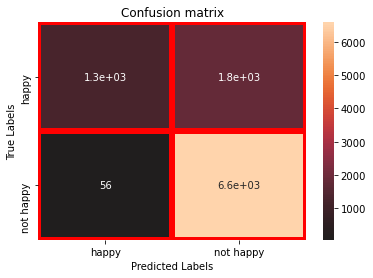

In [21]:
# plot confusion matrix heatmap
conf_mat = confusion_matrix(y_test,y_pred)

ax=plt.subplot()

sns.heatmap(conf_mat,annot=True,ax=ax,linewidths=5,linecolor='r',center=0)

ax.set_xlabel('Predicted Labels');ax.set_ylabel('True Labels')

ax.set_title('Confusion matrix')
ax.xaxis.set_ticklabels(['happy','not happy'])
ax.yaxis.set_ticklabels(['happy','not happy'])
plt.show()

In [22]:
conf_mat

array([[1280, 1816],
       [  56, 6581]], dtype=int64)